In [1]:
import warnings

import dandelion as ddl
import pandas as pd
import scanpy as sc

from numba.core.errors import (
    NumbaDeprecationWarning,
)  # silence numba deprecation warning
from pathlib import Path

warnings.simplefilter("ignore", category=NumbaDeprecationWarning)
warnings.simplefilter("ignore", category=FutureWarning)
sc.settings.verbosity = 3

sc.logging.print_header()
ddl.logging.print_header()

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.24.4 scipy==1.11.2 pandas==2.1.0 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10
dandelion==0.3.4.dev18 pandas==2.1.0 numpy==1.24.4 matplotlib==3.7.1 networkx==3.1 scipy==1.11.2


In [2]:
DATA_PATH = Path("..") / "data"
LOCAL_PATH = DATA_PATH / "local"

In [3]:
adata = sc.read_h5ad(DATA_PATH / "adata_bcr.h5ad")
adata

AnnData object with n_obs × n_vars = 53648 × 32285
    obs: 'sample_id_actual', 'culture_id', 'Treatment', 'Timepoint', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'scrublet_score', 'is_doublet', 'filter_rna', 'batch', 'leiden', 'celltype', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig', 'sample_id', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_genotyped_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_genotyped_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_genotyped_B_VDJ', 'd_call_B_VDJ', 'j_call_B_VDJ', 'v_call_genotyped_B_VJ', 'j_call_B_VJ', 'c_call_B_VDJ', 'c_call_B_VJ', 'productive_B_VDJ', 'productive_B_VJ', 'duplicate_count_B_VDJ', 'duplicate_count_B_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call

In [4]:
adata.obs["sample_id_actual"].value_counts()

sample_id_actual
BC1-CpG          14331
BC2-CpG          10269
BC1-CD40-120h     9221
BC2-CD40-120h     8295
BC1-CD40-72h      6496
BC2-CD40-72h      5036
Name: count, dtype: int64

In [5]:
# split to group

In [6]:
adata1 = adata[adata.obs["Treatment"] == "CpG"].copy()
adata1 = adata1.raw.to_adata()
adata1

AnnData object with n_obs × n_vars = 24600 × 32285
    obs: 'sample_id_actual', 'culture_id', 'Treatment', 'Timepoint', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'scrublet_score', 'is_doublet', 'filter_rna', 'batch', 'leiden', 'celltype', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig', 'sample_id', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_genotyped_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_genotyped_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_genotyped_B_VDJ', 'd_call_B_VDJ', 'j_call_B_VDJ', 'v_call_genotyped_B_VJ', 'j_call_B_VJ', 'c_call_B_VDJ', 'c_call_B_VJ', 'productive_B_VDJ', 'productive_B_VJ', 'duplicate_count_B_VDJ', 'duplicate_count_B_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call

In [7]:
adata2 = adata[adata.obs["Treatment"] == "anti-CD40_IL4_IL5"].copy()
adata2 = adata2.raw.to_adata()
adata2

AnnData object with n_obs × n_vars = 29048 × 32285
    obs: 'sample_id_actual', 'culture_id', 'Treatment', 'Timepoint', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'scrublet_score', 'is_doublet', 'filter_rna', 'batch', 'leiden', 'celltype', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig', 'sample_id', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_genotyped_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_genotyped_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_genotyped_B_VDJ', 'd_call_B_VDJ', 'j_call_B_VDJ', 'v_call_genotyped_B_VJ', 'j_call_B_VJ', 'c_call_B_VDJ', 'c_call_B_VJ', 'productive_B_VDJ', 'productive_B_VJ', 'duplicate_count_B_VDJ', 'duplicate_count_B_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call

In [8]:
# Basic processing to generate umap:
def process(input_adata):
    adata = input_adata.copy()
    if "log1p" in adata.uns:
        adata.uns.pop("log1p")
    sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
    import re

    for i in adata.var.index:
        if re.search("Ig[hkl][vdjc]", i):
            adata.var.loc[i, "highly_variable"] = False
    sc.pl.highly_variable_genes(adata)
    adata.raw = adata
    adata = adata[:, adata.var.highly_variable].copy()
    sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])
    sc.pp.scale(adata, max_value=10)
    sc.tl.pca(adata, svd_solver="arpack")
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)
    return adata

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


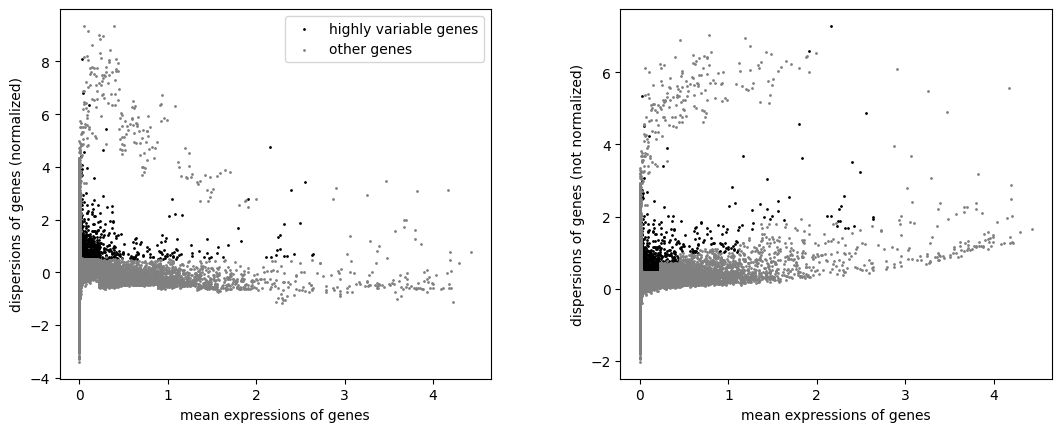

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:21)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:03)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:08)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


In [9]:
adata1 = process(adata1)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


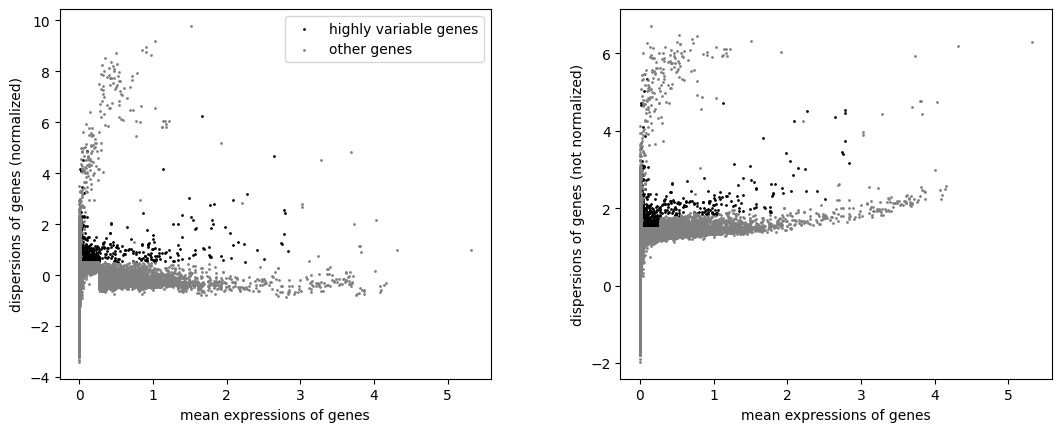

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:32)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:06)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)


In [10]:
adata2 = process(adata2)

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


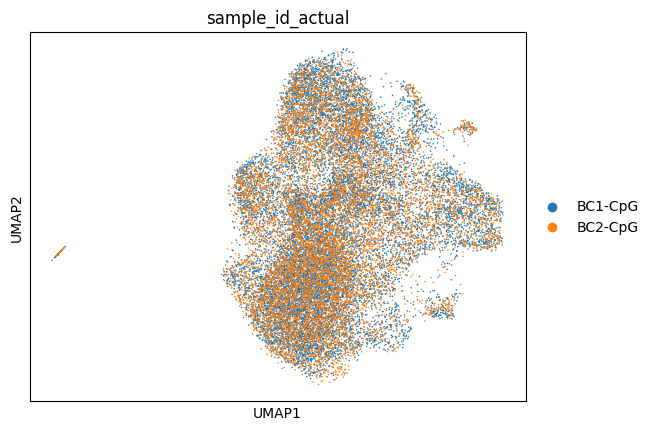

In [10]:
sc.pl.umap(adata1, color=["sample_id_actual"])

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


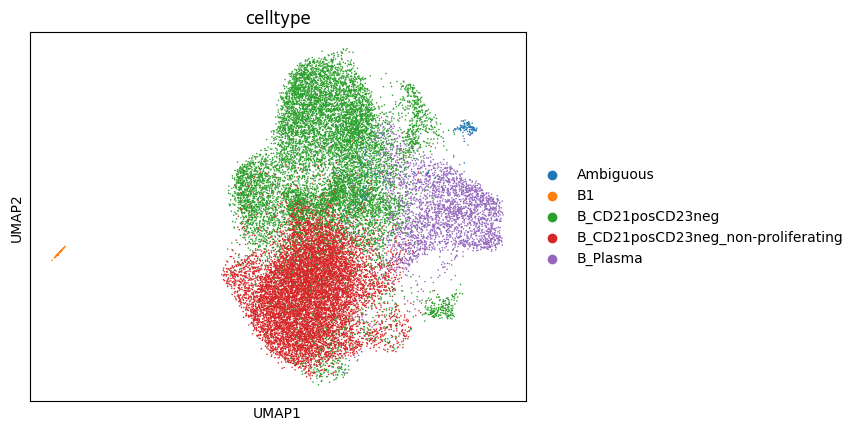

In [11]:
sc.pl.umap(adata1, color=["celltype"])

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


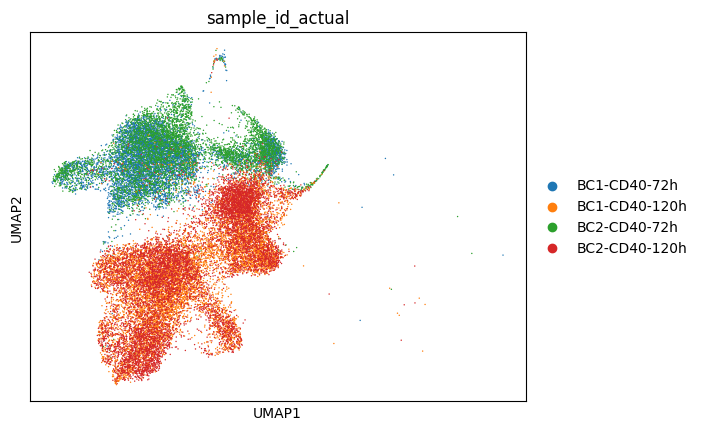

In [12]:
sc.pl.umap(adata2, color=["sample_id_actual"])

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


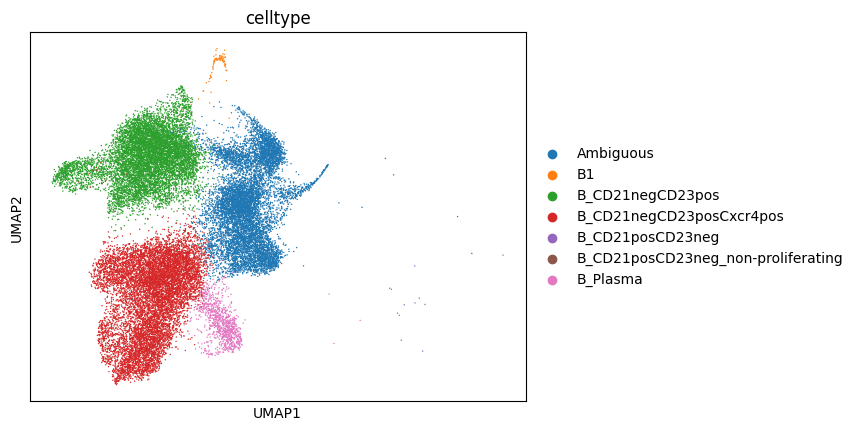

In [13]:
sc.pl.umap(adata2, color=["celltype"])

In [14]:
adata1.obs.clone_id_by_size.value_counts().head(10)

clone_id_by_size
2     21
3     17
5     16
6     15
8     15
11    15
7     15
9     15
4     15
10    15
Name: count, dtype: int64

In [15]:
list(adata1.obs.clone_id_by_size.value_counts().head(10).index)

['2', '3', '5', '6', '8', '11', '7', '9', '4', '10']

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


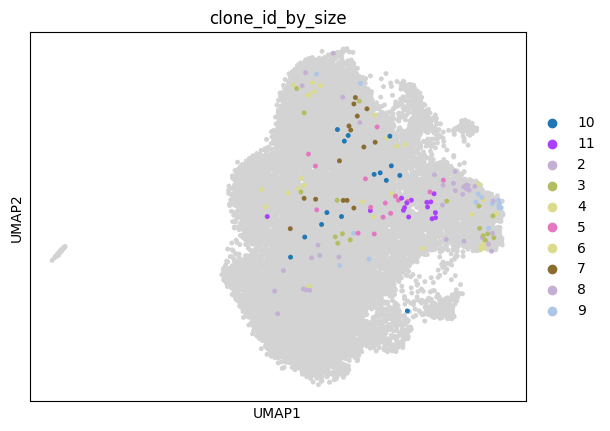

In [16]:
sc.pl.umap(
    adata1,
    color=["clone_id_by_size"],
    groups=list(adata1.obs.clone_id_by_size.value_counts().head(10).index),
    palette=sc.plotting.palettes.default_20,
    size=50,
    na_in_legend=False,
)

In [17]:
adata2.obs.clone_id_by_size.value_counts().head(10)

clone_id_by_size
1          22
20         11
123|124    10
114        10
96         10
82         10
63          9
228         9
66          9
193         9
Name: count, dtype: int64

In [18]:
list(adata2.obs.clone_id_by_size.value_counts().head(10).index)

['1', '20', '123|124', '114', '96', '82', '63', '228', '66', '193']

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


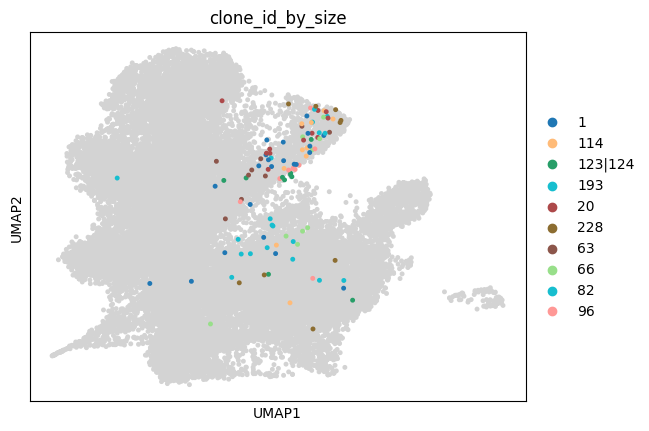

In [19]:
sc.pl.umap(
    adata2,
    color=["clone_id_by_size"],
    groups=list(adata2.obs.clone_id_by_size.value_counts().head(10).index),
    palette=sc.plotting.palettes.default_20,
    size=50,
    na_in_legend=False,
)

Text(0, 0.5, 'clonotype size')

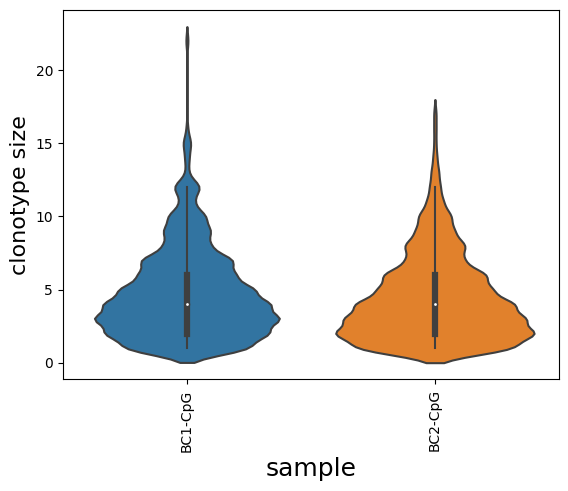

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

df = adata1.obs[["clone_id_size", "sample_id_actual"]][
    pd.notnull(adata1.obs.clone_id_size)
].copy()
ax = sns.violinplot(data=df, y="clone_id_size", x="sample_id_actual", native_scale=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel("sample", fontsize=18)
plt.ylabel("clonotype size", fontsize=16)

Text(0, 0.5, 'clonotype size')

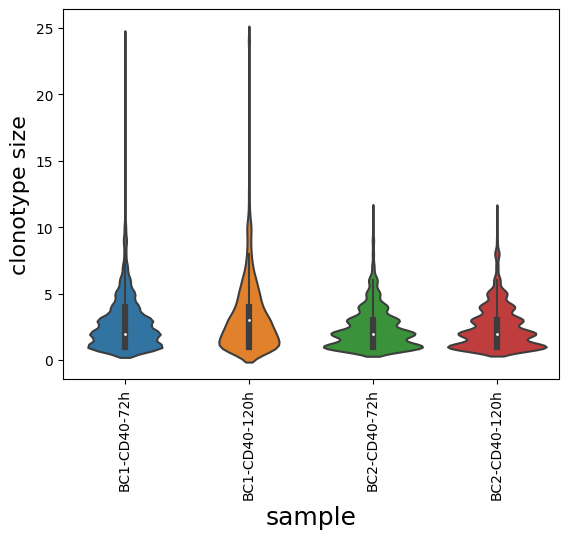

In [25]:
df = adata2.obs[["clone_id_size", "sample_id_actual"]][
    pd.notnull(adata2.obs.clone_id_size)
].copy()
ax = sns.violinplot(data=df, y="clone_id_size", x="sample_id_actual", native_scale=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel("sample", fontsize=18)
plt.ylabel("clonotype size", fontsize=16)

In [26]:
vdj = ddl.read_h5ddl(LOCAL_PATH / "bcr_all.h5ddl")
vdj

Dandelion class object with n_obs = 29181 and n_contigs = 62144
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'c_call', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'consensus_count', 'duplicate_count', 'v_call_10x', 'd_call_10x', 'j_call_10x', 'junction_10x', 'junction_10x_aa', 'j_support_igblastn', 'j_score_igblastn', 'j_call_igblastn', 'j_call_blastn', 'j_identity_blastn', 'j_alignment_length_b

In [27]:
vdj_1 = vdj[vdj.metadata_names.isin(adata1.obs_names)]
vdj_1

Dandelion class object with n_obs = 18125 and n_contigs = 37816
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'c_call', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'consensus_count', 'duplicate_count', 'v_call_10x', 'd_call_10x', 'j_call_10x', 'junction_10x', 'junction_10x_aa', 'j_support_igblastn', 'j_score_igblastn', 'j_call_igblastn', 'j_call_blastn', 'j_identity_blastn', 'j_alignment_length_b

In [28]:
vdj_2 = vdj[vdj.metadata_names.isin(adata2.obs_names)]
vdj_2

Dandelion class object with n_obs = 11056 and n_contigs = 24328
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'c_call', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'consensus_count', 'duplicate_count', 'v_call_10x', 'd_call_10x', 'j_call_10x', 'junction_10x', 'junction_10x_aa', 'j_support_igblastn', 'j_score_igblastn', 'j_call_igblastn', 'j_call_blastn', 'j_identity_blastn', 'j_alignment_length_b

In [29]:
ddl.tl.generate_network(vdj_1)

Generating network


Setting up data: 37816it [00:05, 7385.57it/s]
Linking edges : 100%|██████████| 6387/6387 [00:03<00:00, 2006.12it/s]


Computing network layout
Computing expanded network layout
 finished: Updated Dandelion object: 
   'data', contig-indexed clone table
   'metadata', cell-indexed clone table
   'layout', graph layout
   'graph', network constructed from distance matrices of VDJ- and VJ- chains (0:06:55)


In [30]:
ddl.tl.generate_network(vdj_2)

Generating network


Setting up data: 24328it [00:03, 7705.42it/s]
Linking edges : 100%|██████████| 6199/6199 [00:02<00:00, 3046.90it/s]


Computing network layout
Computing expanded network layout
 finished: Updated Dandelion object: 
   'data', contig-indexed clone table
   'metadata', cell-indexed clone table
   'layout', graph layout
   'graph', network constructed from distance matrices of VDJ- and VJ- chains (0:03:31)


In [37]:
ddl.tl.transfer(adata1, vdj_1, expanded_only=True)

Transferring network
converting matrices


/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: overflow encountered in exp


Updating anndata slots
 finished: updated `.obs` with `.metadata`
added to `.uns['neighbors']` and `.uns['clone_id']`
and `.obsp`
   'distances', clonotype-weighted adjacency matrix
   'connectivities', clonotype-weighted adjacency matrix (0:00:30)


In [38]:
ddl.tl.transfer(adata2, vdj_2, expanded_only=True)

Transferring network
converting matrices


/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: overflow encountered in exp


Updating anndata slots
 finished: updated `.obs` with `.metadata`
added to `.uns['neighbors']` and `.uns['clone_id']`
and `.obsp`
   'distances', clonotype-weighted adjacency matrix
   'connectivities', clonotype-weighted adjacency matrix (0:00:21)


/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


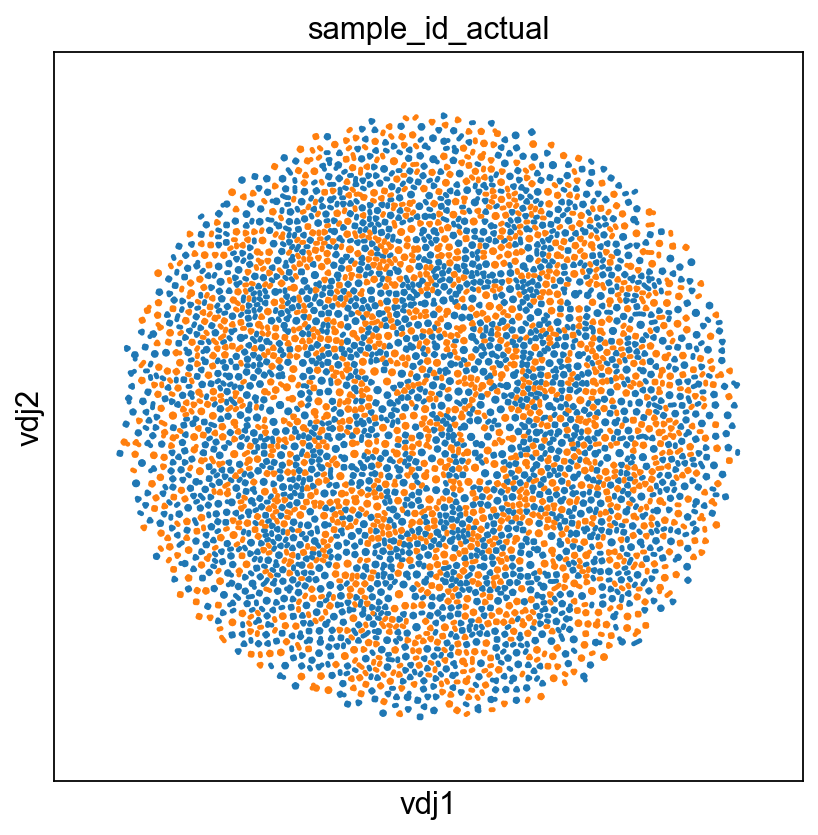

In [52]:
sc.set_figure_params(figsize=(6, 6))
ddl.pl.clone_network(adata1, color=["sample_id_actual"], size=20, legend_loc="none")

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


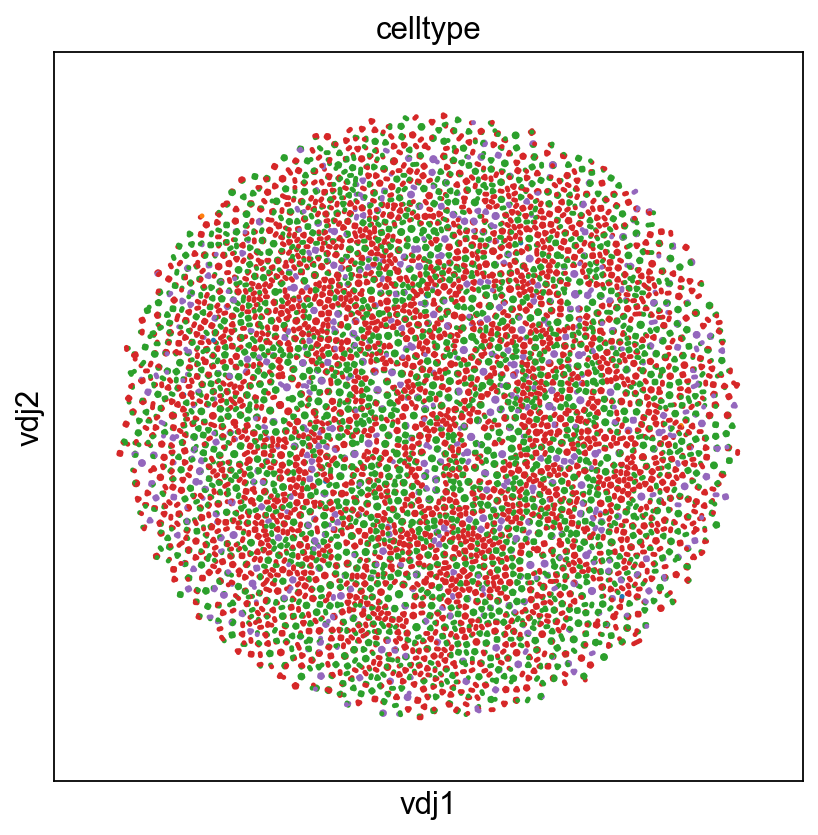

In [53]:
ddl.pl.clone_network(adata1, color=["celltype"], size=20, legend_loc="none")

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


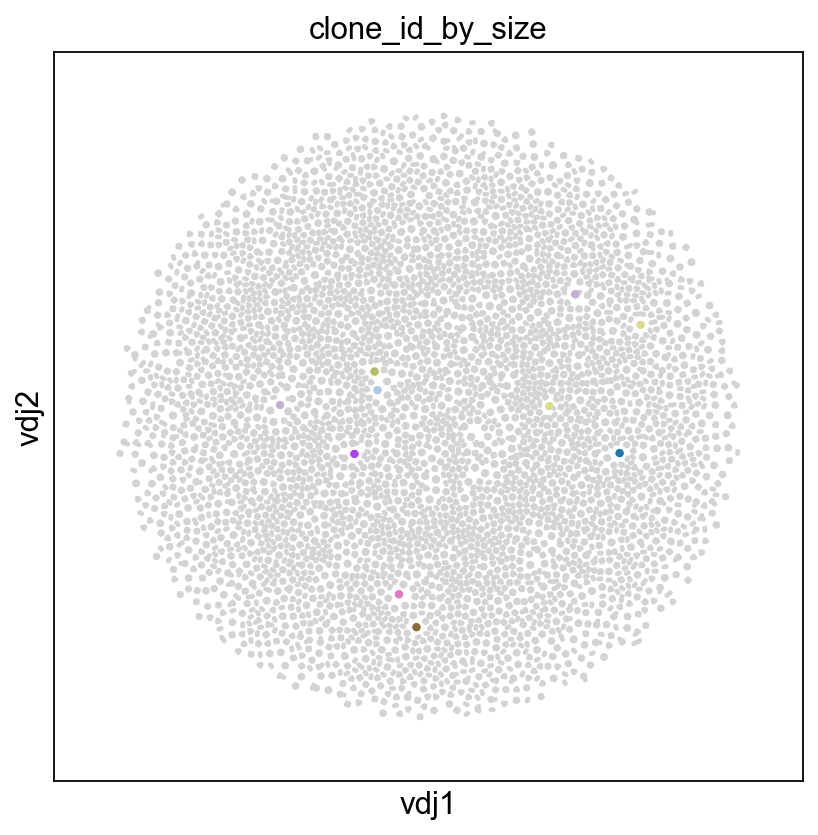

In [56]:
ddl.pl.clone_network(
    adata1,
    color=["clone_id_by_size"],
    groups=list(adata1.obs.clone_id_by_size.value_counts().head(10).index),
    palette=sc.plotting.palettes.default_20,
    size=20,
    legend_loc="none",
)

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


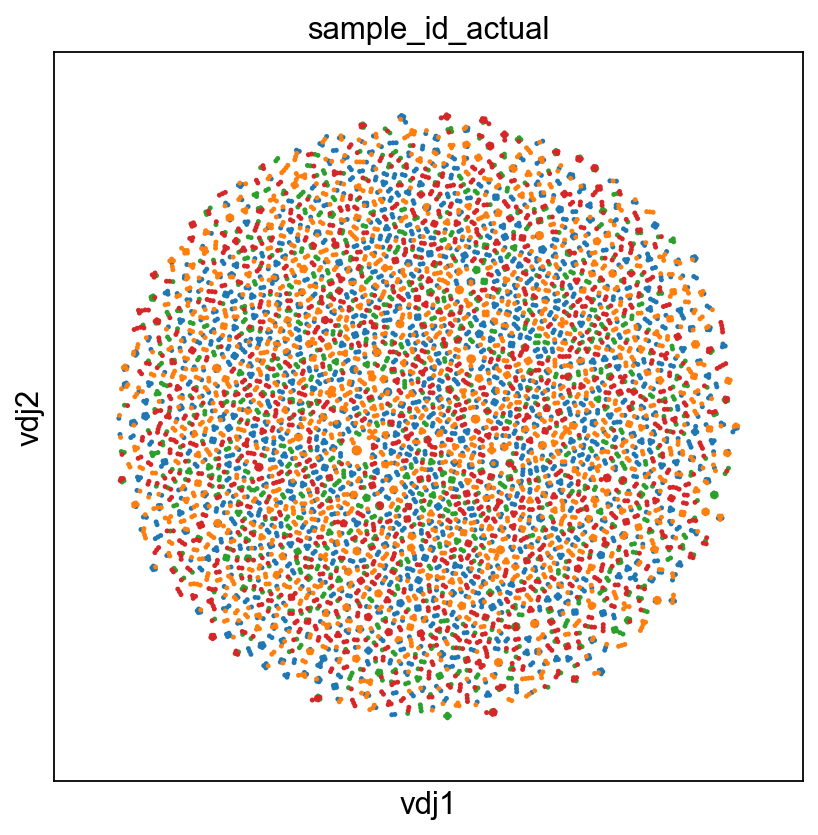

In [50]:
ddl.pl.clone_network(adata2, color=["sample_id_actual"], size=20, legend_loc="none")

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


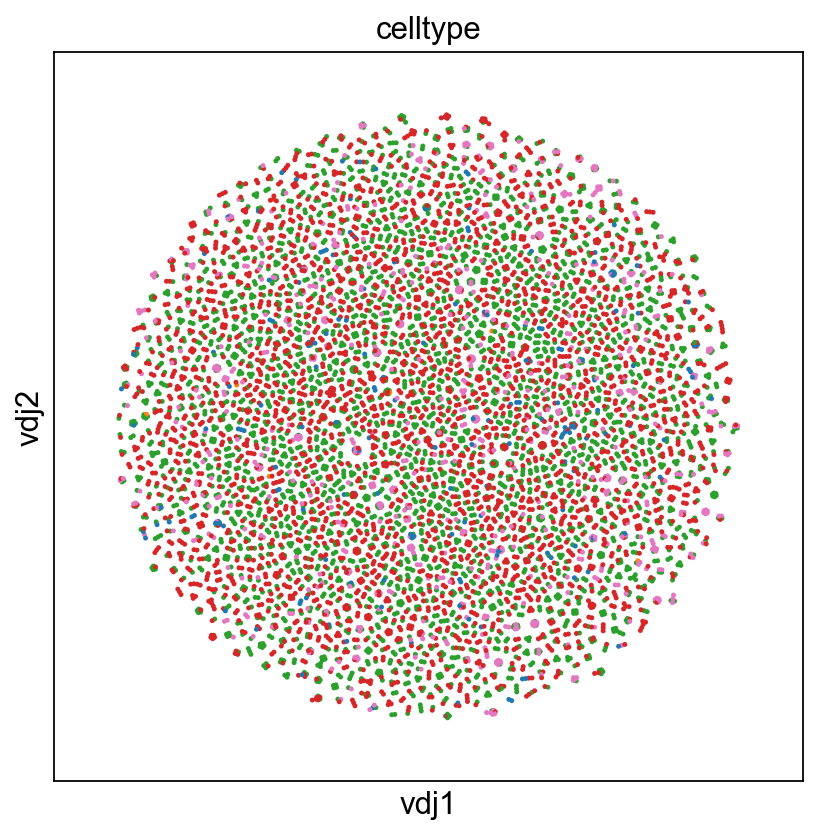

In [49]:
ddl.pl.clone_network(adata2, color=["celltype"], size=20, legend_loc="none")

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


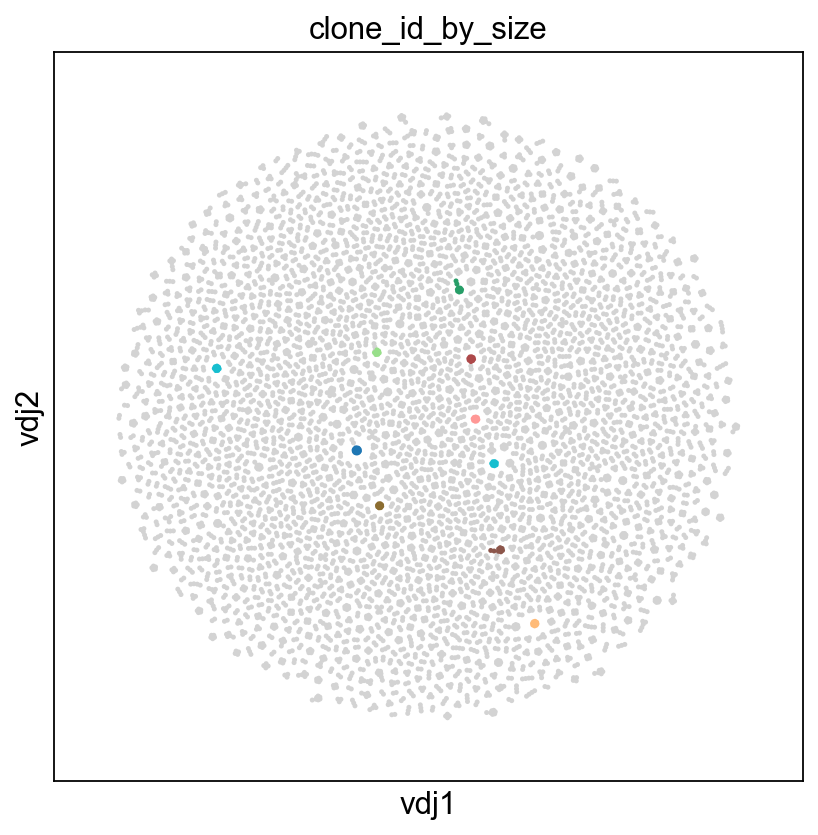

In [61]:
ddl.pl.clone_network(
    adata2,
    color=["clone_id_by_size"],
    groups=list(adata2.obs.clone_id_by_size.value_counts().head(10).index),
    palette=sc.plotting.palettes.default_20,
    size=20,
    legend_loc="none",
)